# Ejemplo del algoritmo de las K-medias

En este ejemplo mostraremos un sencillo codigo para ilustrar el algoritmo de las K-medias y como este puede utilizarse en problemas de análisis cluster.

## Generación de datos utilizando simulación
Simulamos dos muestras aleatorias de tamaño $n=20$ de dos normales bivariantes con media $\mu_1=(1,1)$ en un grupo y $\mu_2=(-1,-1)$ en el otro grupo. Notese que la matriz de varianza-covarianza es la identidad.

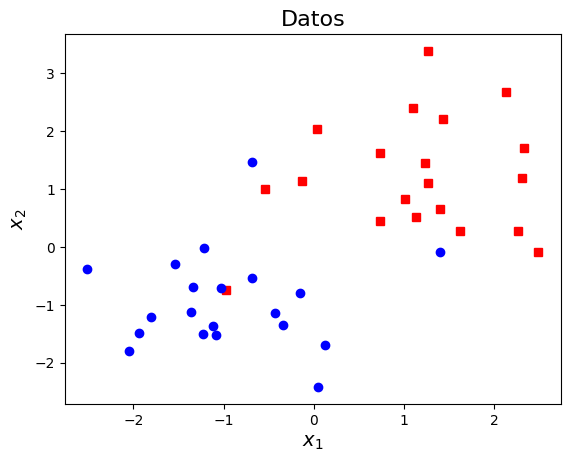

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10) # Fijamos la semilla para la reproducibilidad de los resultados
x1 = np.random.standard_normal((20, 2)) + np.ones((20, 2))
x2 = np.random.standard_normal((20, 2)) - np.ones((20, 2))
X = np.concatenate((x1, x2), axis=0)

# Dibujamos los datos simulados, elejiremos un color para cada muestra
plt.plot(X[:20, 0], X[:20, 1], 'rs')
plt.plot(X[20:, 0], X[20:, 1], 'bo')
plt.title("Datos", fontsize=16)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.show()

## Ejecución del algoritmo de las K-medias

Para ejecutar el algoritmo de las K-medias vamos a hacer uso de la librería Python Scikit-learn (sklearn).

Observese que la implementación del algoritmo de las K-medias de scikit-learn utiliza una distancia Euclidea y no permite especificar otro tipo de distancias.

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(X)
pred = kmeans.predict(X) # También puede utilizarse kmeans.fit_predict(X)
centroides = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


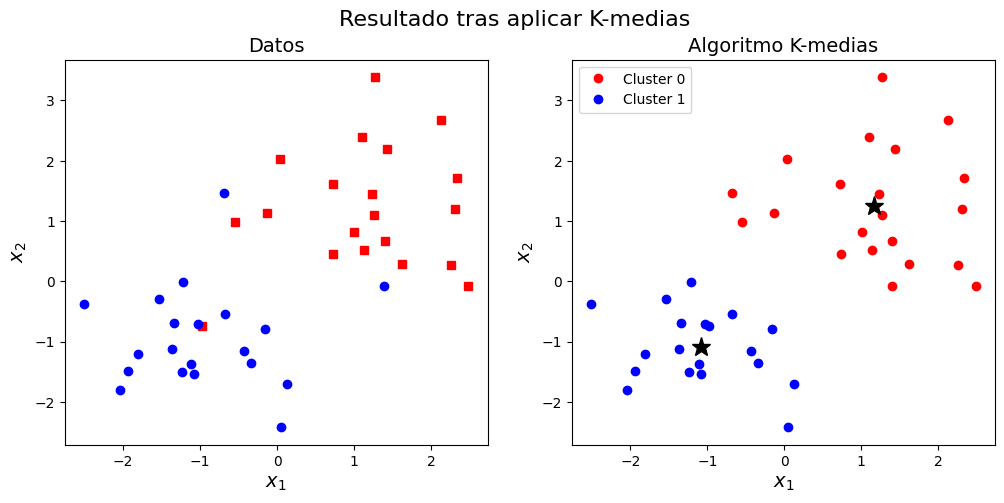

In [18]:
## Representación gráfica de la solución
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle('Resultado tras aplicar K-medias', fontsize=16)

ax1.plot(X[:20, 0], X[:20, 1], 'rs')
ax1.plot(X[20:, 0], X[20:, 1], 'bo')
ax1.set_title("Datos", fontsize=14)
ax1.set_xlabel(r"$x_1$", fontsize=14)
ax1.set_ylabel(r"$x_2$", fontsize=14)

ax2.plot(X[pred==0, 0], X[pred==0, 1], 'ro', label="Cluster 0")
ax2.plot(X[pred==1, 0], X[pred==1, 1], 'bo', label="Cluster 1")
ax2.plot(centroides[:, 0], centroides[:, 1], 'k*', markersize=14) # Dibujamos los centroides
ax2.legend()
ax2.set_title("Algoritmo K-medias", fontsize=14)
ax2.set_xlabel(r"$x_1$", fontsize=14)
ax2.set_ylabel(r"$x_2$", fontsize=14)

fig.show()

## Consideraciones importantes

A continuación vamos a replicar el algoritmo de las K-medias 10 veces con distintos centroides aleatorios iniciales. Se muestra por pantalla la evolución del algoritmo. Se observa que el algoritmo puede converger a tres soluciones diferentes unas con $SSE=69.582$ y $SSE=68.256$ que son óptimos locales y la mejor encontrada con $SSE=67.932$.

Para la obtención de los mismos resultados, se proporcionan los datos a utilizar para este ejemplo en un fichero CSV.

In [10]:
# Descargar el dataset que se utilizará utiliznado un enlace compartido de google drive
# Si la URL es https://drive.google.com/uc?id=IDFICHEROCOMPARTIDO se debe utilizar:
# !gdown --id IDFICHEROCOMPARTIDO
!gdown --id 1eGYAeKky-SuwrGVc2-Pc4swwM8uwUy15

# El fichero puede descargarse manualmente en https://drive.google.com/file/d/1eGYAeKky-SuwrGVc2-Pc4swwM8uwUy15

# Cargamos el fichero
datos_cluster = np.genfromtxt('datos_cluster.csv', delimiter=',')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eGYAeKky-SuwrGVc2-Pc4swwM8uwUy15
To: /content/datos_cluster.csv
100% 1.43k/1.43k [00:00<00:00, 5.06MB/s]


In [11]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=100, verbose=1)
kmeans.fit(datos_cluster)

Initialization complete
Iteration 0, inertia 75.27447672261508.
Iteration 1, inertia 67.93198842844862.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 86.68798171733808.
Iteration 1, inertia 73.03806199644256.
Iteration 2, inertia 69.82787147270922.
Iteration 3, inertia 69.58229457314356.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 94.09352237896512.
Iteration 1, inertia 67.93198842844862.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 117.85085514625978.
Iteration 1, inertia 68.50291264372896.
Iteration 2, inertia 68.25622765885223.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 112.39517735893457.
Iteration 1, inertia 72.15985212493734.
Iteration 2, inertia 67.93198842844862.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 89.37032382770579.
Iteration 1, inertia 68.

KMeans(n_clusters=2, n_init=10, random_state=100, verbose=1)

In [12]:
# La variable inertia_ contiene el valor SSE (suma de los errores al cuadrado)
# al final de la ejecución del algoritmo
kmeans.inertia_

67.93198842844862

## Estimación del hiperparámetro K utiliznado el índice BIC

A continuación vamos a estimar el hiperparámetro K (número de grupos) mediante el uso del ínice BIC (Bayesian Information Criterion).

El valor del  índice BIC para una solución del problema cluster con $K$ grupos se define:
\begin{equation}
BIC(K)=-2 \sum_{k=1}^K \xi(k)+ 2\cdot K\cdot P\cdot\ln(n)
\end{equation}
donde:

*   $P$ es el número de variables
*   $K$ es el número de clusters
*   $n$ es el número de datos
*   $\xi(k):$ es una medida de la varianza estimada dentro del grupo $k$ definida por
\begin{equation}
\xi(k):=-n_k \left ( \sum_{j=1}^P \frac{1}{2} \ln (\widehat \sigma^2_j+\widehat \sigma ^2_{kj})\right )
\end{equation}
donde $n_k$ es el número de elementos en el cluster $k$,  $\widehat \sigma^2_j$ y $\widehat \sigma^2_{jk}$  son respectivamente  una estimación de la varianza del atributo $j$ en toda la muestra y  dentro del grupo $k$.


Observese que el criterio BIC consta de dos sumandos. El primero está asociado a la variabilidad dentro de los grupos y el segundo es una penalización por los parámetros estimados. Si se aumenta el valor de $K$ el primer sumando decrece pero el segundo sumando aumenta.  Se iría aumentando el valor de $K$ mientras que el incremento provocado por los parámetros sea absorbido por la mejor conformación de los clusters. O dicho matemáticamente se tomaría como $K^*$ el valor que minimice el BIC.

In [ ]:
def BIC(K, grupos, X):
  """
  K: Número de grupos (clusters)
  grupos: Vector que contiene los grupos de los datos
  X: Matriz de datos
  """
  N = X.shape[0] # Número de datos
  P = X.shape[1] # Número de variables
  xi = np.zeros((1,K)) # Vector xi

  # Calculamos el sumario de xi en la fórmula
  for k in range(0, K):
    suma = 0
    for j in range(0, P):
      sigma = np.square(np.std(X[:, j]))
      sigma_j = np.square(np.std(X[grupos==k, j]))
      suma += 0.5*np.log(sigma + sigma_j)

    n_k = sum(grupos==k) # Número de elementos en el grupo k
    xi[0, k] = -n_k*suma

  bic = -2*np.sum(xi) + 2*K*P*np.log(N)
  return bic

In [ ]:
## Calcular el BIC del modelo K-means anterior
kmeans = KMeans(n_clusters=2, n_init=10, random_state=100)
grupos = kmeans.fit_predict(datos_cluster)

BIC(2, grupos, datos_cluster)

113.42536063456606

A continuación vamos a determinar el valor de $K$ medieante el metodo propuesto en Xia y Chen en 2007.

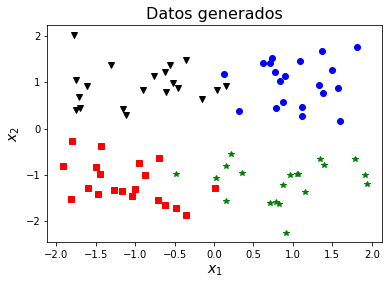

In [ ]:
## Generamos datos simulados (K=4)
sigma = 0.5 # Desviación típica de la variable normal empleada en la generación de datos
n = 20 # Número de datos por grupo
Kmax = 10 # Número máximo de clusters a analizar

np.random.seed(100) # Fijamos la semilla para la reproducibilidad de los resultados
x1 = sigma*np.random.standard_normal((n, 2)) + np.ones((n, 2))
x2 = sigma*np.random.standard_normal((n, 2)) - np.ones((n, 2))
x3 = sigma*np.random.standard_normal((n, 2)) + np.concatenate((np.ones((n, 1)), -np.ones((n, 1))), axis=1)
x4 = sigma*np.random.standard_normal((n, 2)) + np.concatenate((-np.ones((n, 1)), np.ones((n, 1))), axis=1)
X = np.concatenate((x1, x2, x3, x4), axis=0)

# Dibujamos los datos simulados, elegiremos un color para cada muestra
color = ['b','r','g','k']
forma = ['o','s','*','v']
for k in range(0, 4):
  plt.plot(X[k*n:(k+1)*n, 0], X[k*n:(k+1)*n, 1], color[k]+forma[k])

plt.title("Datos generados", fontsize=16)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.show()

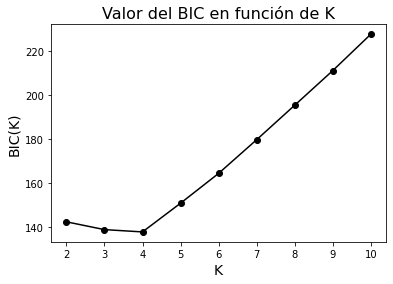

In [ ]:
## Calculo del BIC
BIC_array = []

for k in range(2, Kmax+1):
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=100)
  grupos = kmeans.fit_predict(X)
  BIC_array.append(BIC(k, grupos, X))

# Dibujamos el BIC obtenido para cada valor de k
plt.plot(np.arange(2, Kmax+1), BIC_array, "ko-")
plt.title("Valor del BIC en función de K", fontsize=16)
plt.xlabel("K", fontsize=14)
plt.ylabel("BIC(K)", fontsize=14)
plt.show()

¿Cuál es el valor óptimo de K según el gráfico anterior?

In [ ]:
## Dibujamos la solución con K = 4
K = 4
kmeans = KMeans(n_clusters=K, random_state=10)
pred = kmeans.fit_predict(X)

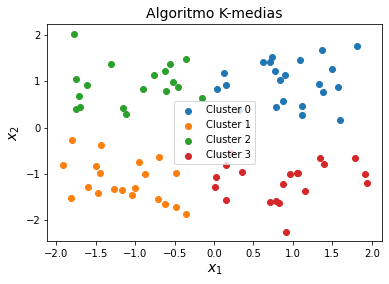

In [ ]:
## Representación gráfica de la solución
for k in range(0, K):
  plt.scatter(X[pred==k, 0], X[pred==k, 1], label="Cluster {}".format(k))

plt.title("Algoritmo K-medias", fontsize=14)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.show()

## Detección de observaciones influyentes en el análisis cluster con K-medias
Para ello ejmplearemos la técnica de jackknife. Si es usada en combinación con el algoritmo de $K-$means el índice adecuado es tomar como $\psi_i$ la suma de los errores al cuadrado $SSE_i$. Este método realizaría $n$  análisis clusters, eliminando en cada una de las veces un dato. Finalmente se detectaría si la muestra $\{\psi_i\}$ contiene outliers basándonos por ejemplo en el método de bandas:
\begin{equation}
\hbox{Si} \left |SSE_i-\mu_{SSE} \right | > k * \sigma_{SSE} \Rightarrow i \hbox{ es observación inluyente}
\end{equation}
donde $\mu_{SSE}, \sigma_{SSE}$ son respectivamente la media y desviación típica de la muestra $\{SSE_i\}$.  El valor $k$ es el  umbral elegido.

In [ ]:
# Lo primero que haremos es añadir dos observaciones influyentes a un dataset.
# Por ejemplo, vamos a modificar las observaciones nº 18 y 38 de datos_cluster
# (Posiciones 17 y 37 si empezamos a contar en 0)
datos_cluster[17,:] = [-3,3]
datos_cluster[37,:] = [3,-3]
datos_cluster

array([[ 1.42889303,  0.20766313],
       [ 0.70086948,  0.04702531],
       [ 0.10013148,  1.35390545],
       [ 1.63474546,  2.59702632],
       [ 1.06745359,  1.52747025],
       [ 0.81287946,  1.8542023 ],
       [ 1.29172746,  2.34184652],
       [ 1.98769469, -1.49953344],
       [ 1.39293457,  0.83244068],
       [ 1.19455137,  1.35301531],
       [ 1.27978496,  1.71725373],
       [ 1.05122031, -0.30485164],
       [ 0.22553376, -0.00586895],
       [ 1.78678171,  1.79068347],
       [ 2.40890695,  0.88342867],
       [ 0.46590142,  1.55308989],
       [ 2.92775843,  0.0393552 ],
       [-3.        ,  3.        ],
       [ 0.75624964,  1.76120028],
       [ 0.10239934,  2.19330715],
       [ 0.63205722, -1.3020323 ],
       [-2.5321896 ,  0.81358213],
       [-2.3368524 , -0.08514825],
       [-2.4738465 , -1.05708072],
       [-1.04166307,  0.30936208],
       [-1.61550734, -2.04473585],
       [ 0.31415481, -1.34826681],
       [-2.45506658,  0.41256116],
       [-2.74234922,

In [ ]:
N = datos_cluster.shape[0] # Número de observaciones
K = 2 # Número de clusters

SSE = []
for i in range(0, N):
  X_sin_i = np.delete(datos_cluster, i, axis=0) # Eliminamos la observación i
  # Aplicamos K-medias a X_sin_i y obtenemos el índice SSE
  kmeans = KMeans(n_clusters=K, n_init=10, random_state=100).fit(X_sin_i)
  SSE.append(kmeans.inertia_)

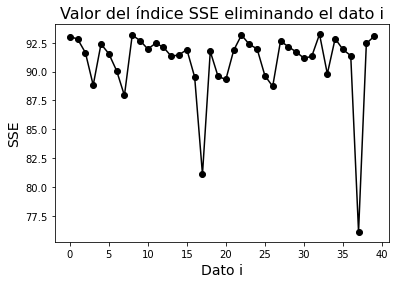

In [ ]:
## Detección visual de outliers
# Dibujamos el SSE obtenido eliminando cada observación
plt.plot(np.arange(0, N), SSE, "ko-")
plt.title("Valor del índice SSE eliminando el dato i", fontsize=16)
plt.xlabel("Dato i", fontsize=14)
plt.ylabel("SSE", fontsize=14)
plt.show()

# Observando la gráfica vemos que los outliers ocupan las posiciones 17 y 37
# (Empezando a contar en 0)

In [ ]:
## Detección analítica de outliers
sigma = np.std(SSE) # Desviación típica de SSE
mu = np.mean(SSE) # Media
umbral = 2 # Umbral: 2 para distribuciones normales y 3 para cualquier otra distribución

outliers = []
for i in range(0, N):
  if np.abs(SSE[i]-mu) > umbral*sigma:
    outliers.append(i)
print(outliers)

# Por tanto, los outliers ocupan las posiciones 17 y 37 (Empezando a contar en 0)
# Este resultado es coherente con la detección visual que hemos realizado previamente

[17, 37]
